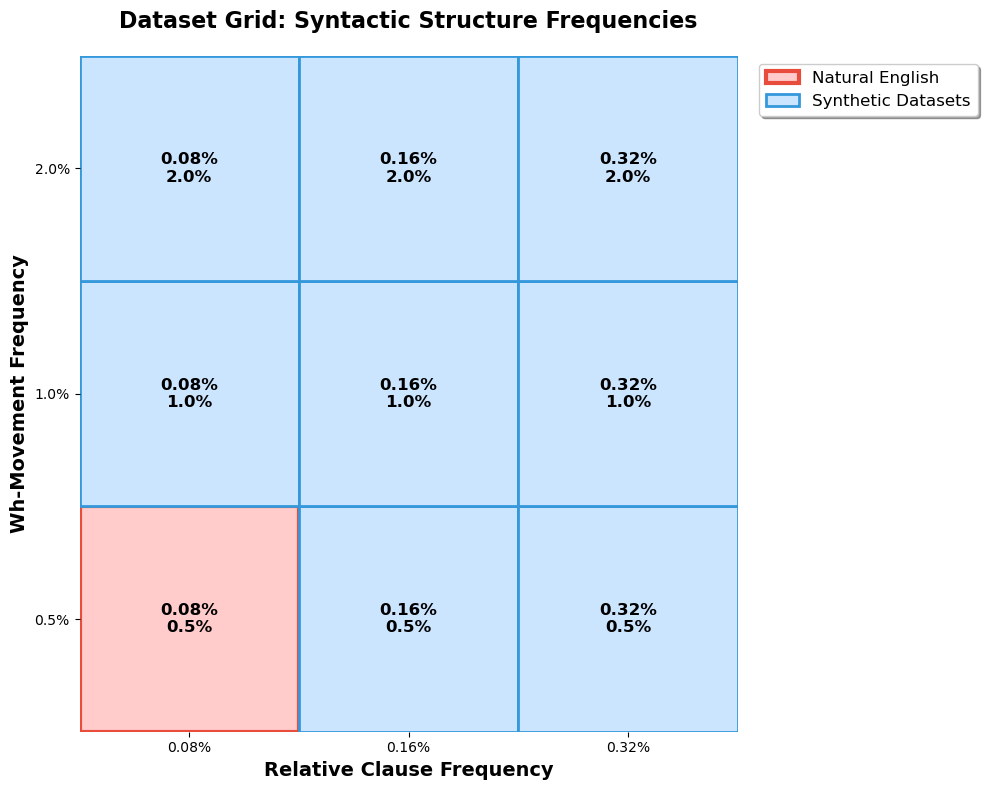

Dataset Grid Summary:
Dataset 1: (0.080%, 0.5%) - Natural
Dataset 2: (0.160%, 0.5%) - Synthetic
Dataset 3: (0.320%, 0.5%) - Synthetic
Dataset 4: (0.080%, 1.0%) - Synthetic
Dataset 5: (0.160%, 1.0%) - Synthetic
Dataset 6: (0.320%, 1.0%) - Synthetic
Dataset 7: (0.080%, 2.0%) - Synthetic
Dataset 8: (0.160%, 2.0%) - Synthetic
Dataset 9: (0.320%, 2.0%) - Synthetic


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Your frequency values
rel_clause_freqs = [0.08/100, 0.16/100, 0.32/100]  # 0.08%, 0.16%, 0.32%
wh_movement_freqs = [0.5/100, 1/100, 2/100]        # 0.5%, 1%, 2%

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors
natural_color = '#ffcccb'    # Light red for natural
synthetic_color = '#cce5ff'  # Light blue for synthetic

# Create grid
for i, wh_freq in enumerate(wh_movement_freqs):
    for j, rc_freq in enumerate(rel_clause_freqs):
        # Determine color (natural is first of each: i=0, j=0)
        if i == 0 and j == 0:
            color = natural_color
            edge_color = '#e74c3c'
            edge_width = 3
        else:
            color = synthetic_color
            edge_color = '#3498db'
            edge_width = 2
        
        # Draw rectangle
        rect = plt.Rectangle((j, i), 1, 1, 
                           facecolor=color, edgecolor=edge_color, 
                           linewidth=edge_width)
        ax.add_patch(rect)
        
        # Add text with frequencies
        text = f'ORC : {rc_freq:.2%}\n Obj Wh-movement : {wh_freq:.1%}'
        ax.text(j + 0.5, i + 0.5, text,
               ha='center', va='center', fontsize=12, fontweight='bold',
               color='black')

# Set up axes
ax.set_xlim(0, len(rel_clause_freqs))
ax.set_ylim(0, len(wh_movement_freqs))

# Remove ticks from the inside
ax.set_xticks(np.arange(len(rel_clause_freqs)) + 0.5)
ax.set_yticks(np.arange(len(wh_movement_freqs)) + 0.5)

# Set labels
ax.set_xticklabels([f'{freq:.2%}' for freq in rel_clause_freqs])
ax.set_yticklabels([f'{freq:.1%}' for freq in wh_movement_freqs])

# Labels and title
ax.set_xlabel('Relative Clause Frequency', fontsize=14, fontweight='bold')
ax.set_ylabel('Wh-Movement Frequency', fontsize=14, fontweight='bold')
ax.set_title('Dataset Grid: Syntactic Structure Frequencies', 
             fontsize=16, fontweight='bold', pad=20)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=natural_color, edgecolor='#e74c3c', linewidth=3, 
          label='Natural English'),
    Patch(facecolor=synthetic_color, edgecolor='#3498db', linewidth=2, 
          label='Synthetic Datasets')
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.02, 1),
          frameon=True, fancybox=True, shadow=True, fontsize=12)

# Adjust layout to accommodate legend
plt.tight_layout()
plt.show()

# Optional: Save the plot
# plt.savefig('syntactic_frequency_grid.png', dpi=300, bbox_inches='tight')

# Print summary
print("Dataset Grid Summary:")
print("=" * 50)
dataset_num = 1
for i, wh_freq in enumerate(wh_movement_freqs):
    for j, rc_freq in enumerate(rel_clause_freqs):
        status = "Natural" if (i == 0 and j == 0) else "Synthetic"
        print(f"Dataset {dataset_num}: ({rc_freq:.3%}, {wh_freq:.1%}) - {status}")
        dataset_num += 1